## Using ARIMA  for forecasting

PACF - decides the "k" value in forecasting which means how much lag is related to the current prediction should we consider for the forecasting

#### Essentials for ARIMA --->> {P(PACF - Partial AutoCorrelaion Fnction), d (no of times we are doing the Differencing), q (ACF)}

#### **Auto regressive** -- Means how much of previous data is considered to predict the Future value prediction


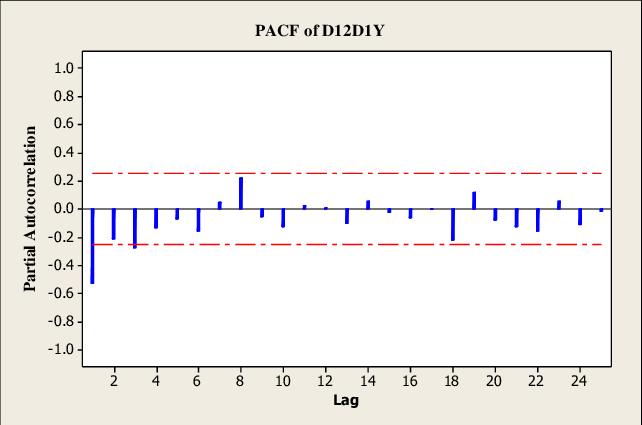

In [102]:
from IPython.display import Image


# Display an image from a file on your local machine
Image(filename= r"C:\Users\Subham Gupta\Desktop\Work\Forecasting\PACF-graph-of-the-series-D12D1Y.png")



Sarimax ( p,d, q value ++--seasonal (p, d, q values))

### Steps to use ARIMA Model:--{STATIONARY DATA}
#### 1.) Check the data for stationary data 
#### -- Hypothesis Test (Dickey Fuller Test)
#####       H0 -> Unit Root = 1 --> Data is not stationary
#####      H1 -> Unit Root < 1 --> Data is Stationary

#### Stationary Data :- Axioms
##### 1. Mean must be "Constant" and Standard Decvation must be "Constant "

### **ADF Fuller test** ----->>
##### If p < 0.05 then H0 is "Rejected", if p >= 0.05 h0 "Accepted"

#### Load Dataset

In [103]:
# importing Necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sms

In [104]:
import pandas as pd

# Specify the full path to your CSV file
df_airline = pd.read_csv(r"C:\Users\Subham Gupta\Desktop\Work\Forecasting\airline_passengers.csv")

# Display the first few rows of the DataFrame
df_airline.head()


,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


#### Finding Nan Value

In [105]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [106]:

# Find rows with any null values
null_rows = df_airline[df_airline.isnull().any(axis=1)]
null_rows.index

Index([144], dtype='int64')

In [107]:
df_airline.iloc[144] #['Thousands of Passengers']

Month                      International airline passengers: monthly tota...
Thousands of Passengers                                                  NaN
Name: 144, dtype: object

In [108]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [109]:
#### Drop the duplicate/duplicates

In [110]:
df_airline.dropna(inplace = True,axis = 0)

In [111]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [112]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [113]:
#### Convert "object type to datetime"
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [114]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [115]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


#### Setting Month as Index

In [116]:
df_airline.set_index('Month', inplace = True)

In [117]:
df_airline.head()


,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

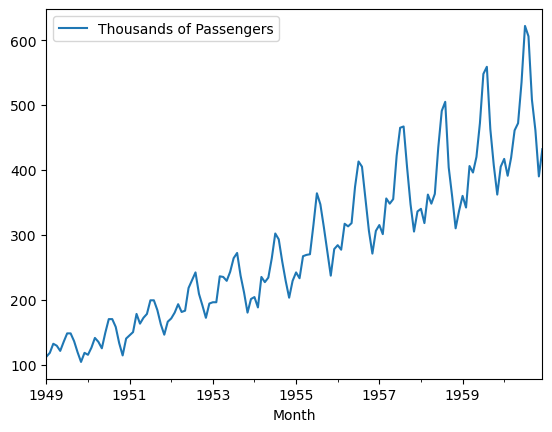

In [118]:
df_airline.plot()

In [119]:
from statsmodels.tsa.stattools import adfuller

In [120]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis.Data has no root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
              

In [121]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics:0.8153688792060597
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


#### For making the DATA stationary

In [122]:
## use Tecehniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [123]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [124]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics:-2.829266824169992
p- value: 0.0542132902838265
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [125]:
# 2ND DIFF
## use Tecehniques Differencin
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [126]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [127]:
df_airline['Passengers Second Difference'].dropna()

Month
1949-03-01      8.0
1949-04-01    -17.0
1949-05-01     -5.0
1949-06-01     22.0
1949-07-01     -1.0
              ...  
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: Passengers Second Difference, Length: 142, dtype: float64

In [128]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics:-16.384231542468527
p- value: 2.732891850014085e-29
Strong evidence against the null hypothesis, reject the null hypothesis.Data has no root and is stationary


#### Also Check for 12 Month--as it is a Seasonal TREND


In [129]:
### 12 Months
## use Tecehniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)


In [132]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [133]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics:-3.3830207264924805
p- value: 0.011551493085514982
Strong evidence against the null hypothesis, reject the null hypothesis.Data has no root and is stationary


In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [142]:
### Pearson's Correlation

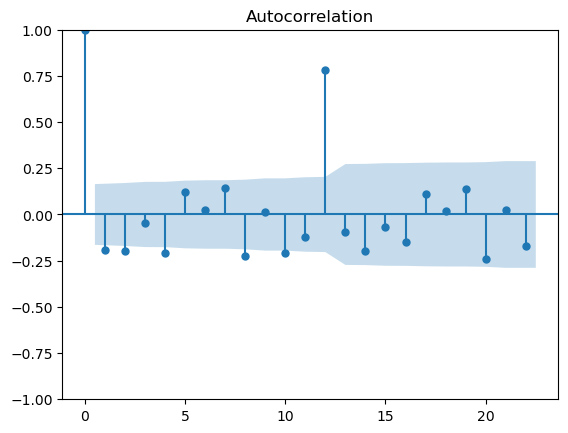

In [146]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

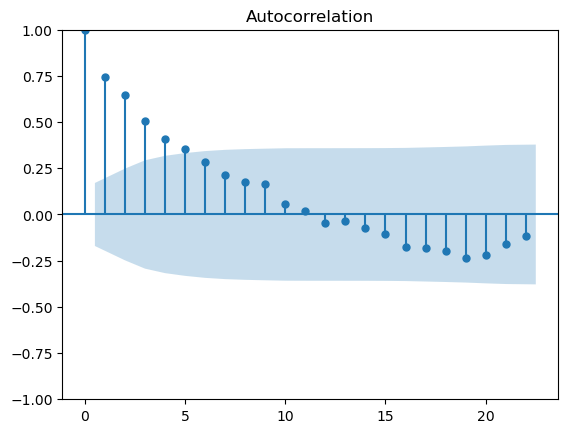

In [149]:
_acf = plot_acf(df_airline["Passengers 12 Difference"].dropna())

### Seeing the PLot we can take ((q = 5)), leaving out the first (taking it as 0)
## Error also increases with increasing bound

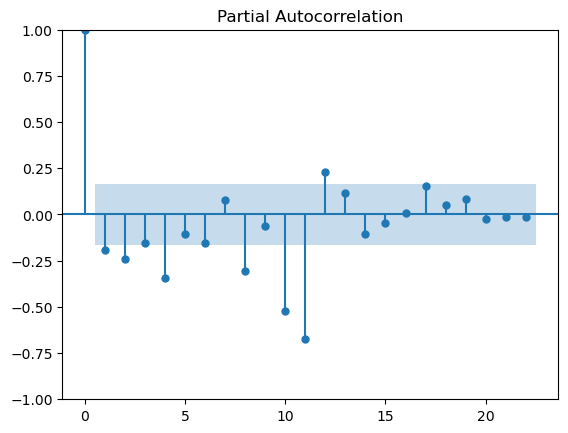

In [153]:
pacf_Second = plot_pacf(df_airline["Passengers Second Difference"].dropna())

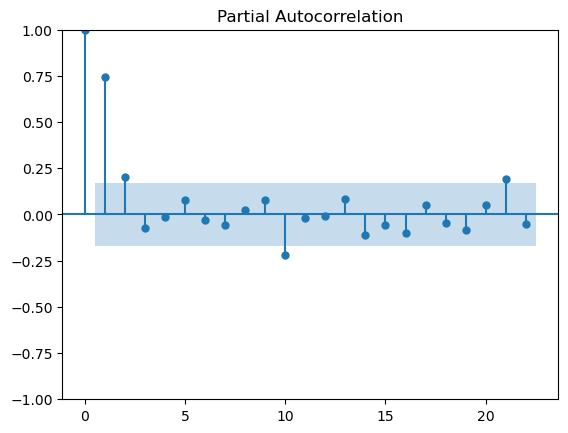

In [159]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

## Seeing the plot here FIRST go with q = 2, 
## Then p = 10 id it doesn't Work(As you can see 10th one is also OUT)

In [160]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
